In [ ]:
Mini Project

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des visualisations - utilisation d'un style valide de matplotlib
plt.style.use('default')  # ou 'classic', 'ggplot', etc.
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [3]:
# Load the dataset
file_path = 'Apple Stock Prices (1981 to 2023).csv'
data = pd.read_csv(file_path)

In [5]:
# Display the first few rows of the dataset
data_head = data.head()

In [6]:
# Check for null values
null_values = data.isnull().sum()


In [7]:
# Check data types
data_types = data.dtypes

data_head, null_values, data_types

(         Date      Open      High       Low     Close  Adj Close    Volume
 0  02/01/1981  0.154018  0.155134  0.154018  0.154018   0.119849  21660800
 1  05/01/1981  0.151228  0.151228  0.150670  0.150670   0.117244  35728000
 2  06/01/1981  0.144531  0.144531  0.143973  0.143973   0.112032  45158400
 3  07/01/1981  0.138393  0.138393  0.137835  0.137835   0.107256  55686400
 4  08/01/1981  0.135603  0.135603  0.135045  0.135045   0.105085  39827200,
 Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64,
 Date          object
 Open         float64
 High         float64
 Low          float64
 Close        float64
 Adj Close    float64
 Volume         int64
 dtype: object)

Step 3: Data Visualization

In [8]:
# Convert 'Date' column to datetime with explicit format specification
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')

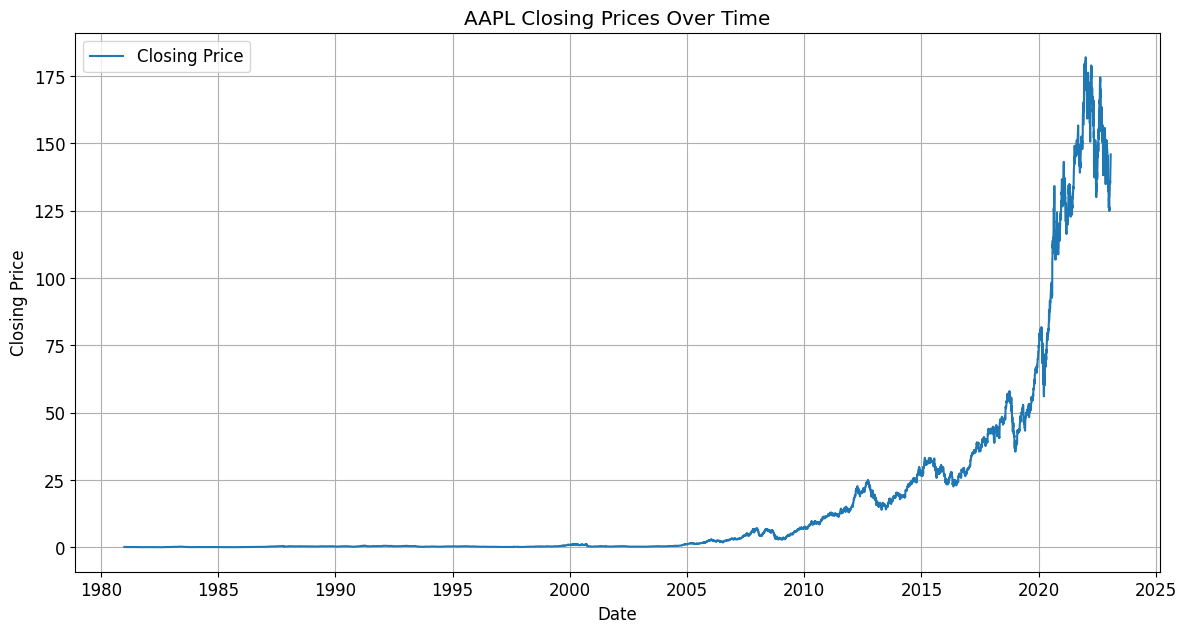

In [9]:
# Plot closing prices over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL Closing Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()

Closing Prices Over Time: The plot shows a general upward trend in the closing prices of AAPL stock over the years, with noticeable fluctuations and significant growth in recent years.

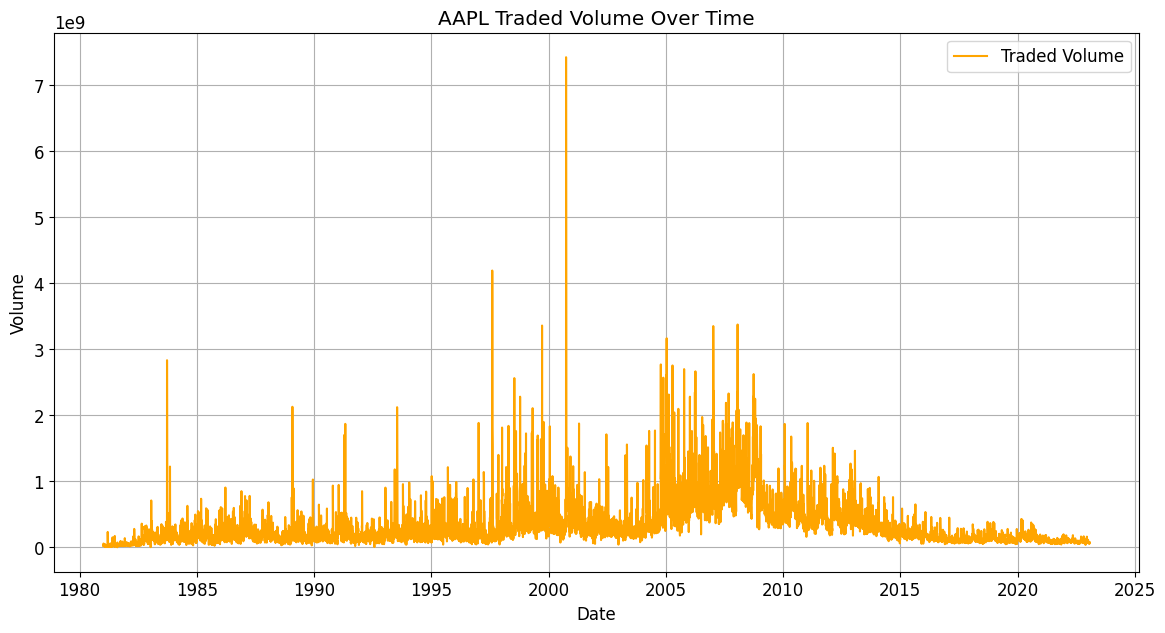

In [10]:
# Plot traded volume over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Volume'], label='Traded Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('AAPL Traded Volume Over Time')
plt.legend()
plt.grid(True)
plt.show()

Traded Volume Over Time: The volume of traded shares has varied over time, with some periods showing higher trading activity, likely corresponding to significant market events or company announcements.

Step 4: Statistical Analysis

In [11]:
# Compute summary statistics
summary_stats = data.describe()

In [12]:
# Calculate moving average for closing prices
data['Moving_Average'] = data['Close'].rolling(window=20).mean()

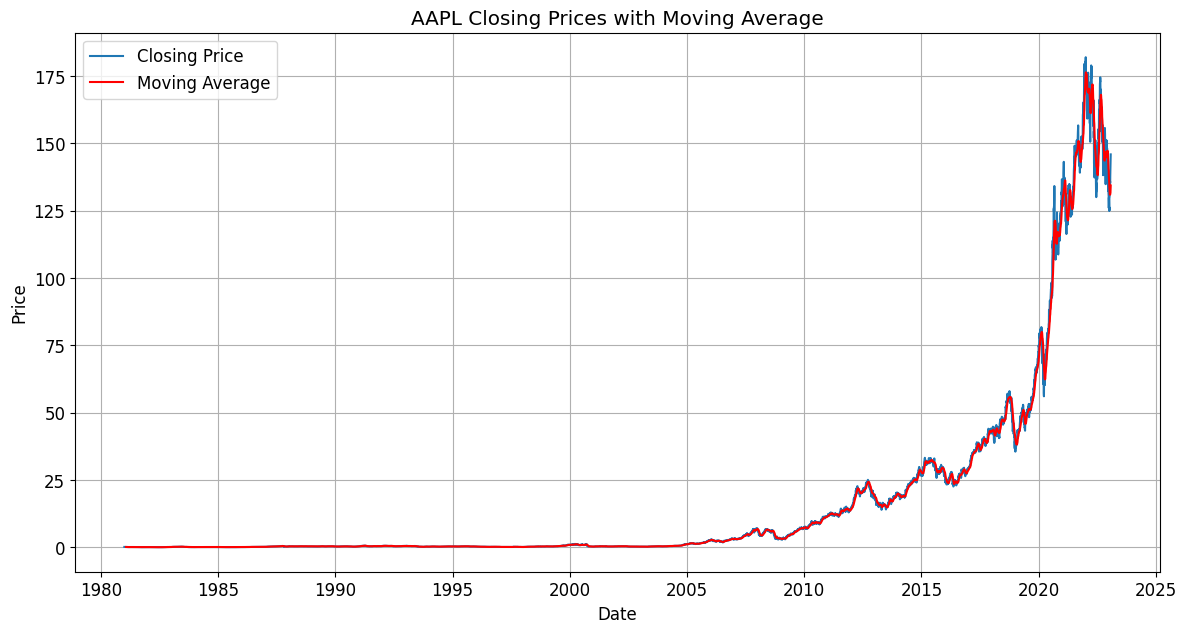

,Date,Open,High,Low,Close,Adj Close,Volume
count,10608,10608.000000,10608.000000,10608.000000,10608.000000,10608.000000,1.060800e+04
mean,2002-01-05 14:08:33.122171904,16.689173,16.879955,16.500822,16.697362,16.027345,3.275098e+08
min,1981-01-02 00:00:00,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00
25%,1991-06-27 18:00:00,0.287946,0.296875,0.282355,0.288923,0.238909,1.213044e+08
50%,2002-01-02 12:00:00,0.488839,0.495536,0.480446,0.487701,0.404851,2.145976e+08
75%,2012-07-13 18:00:00,16.320893,16.418483,16.151249,16.269554,14.073167,4.066804e+08
max,2023-01-27 00:00:00,182.630005,182.940002,179.119995,182.009995,180.959747,7.421641e+09
std,NaN,35.450519,35.882848,35.031289,35.473912,35.154878,3.378203e+08


In [25]:
# Plot moving average
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.plot(data['Date'], data['Moving_Average'], label='Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Closing Prices with Moving Average')
plt.legend()
plt.grid(True)
plt.show()

summary_stats

Summary Statistics: The dataset includes various statistical measures such as mean, standard deviation, minimum, quartiles, and maximum values for each column. For example, the mean closing price is approximately $16.70 with a standard deviation of $35.47, indicating significant variability in the stock prices over time.

Moving Average: The plot of closing prices with a moving average (20-day window) shows a smoothed trend line that helps identify the overall direction of the stock price movement, reducing the noise from daily fluctuations.

Step 5: Hypothesis Testing

We'll execute a t-test to compare average closing prices across different years and examine the distribution of daily returns.

In [14]:
# Extract years from the date column
data['Year'] = data['Date'].dt.year

In [23]:
from scipy.stats import ttest_ind, normaltest

# Perform a t-test to compare average closing prices between two different years
year1 = data[data['Year'] == 2020]['Close']
year2 = data[data['Year'] == 2021]['Close']
t_stat, p_value = ttest_ind(year1, year2, nan_policy='omit')

# Print the t-test results
print(f'T-test results: t-statistic = {t_stat}, p-value = {p_value}')

# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Test for normality of daily returns
stat_norm, p_norm = normaltest(data['Daily_Return'].dropna())

# Print the normality test results
print(f'Normality test results: statistic = {stat_norm}, p-value = {p_norm}')


T-test results: t-statistic = -27.588625391847753, p-value = 1.0094191871894337e-102
Normality test results: statistic = 2719.205287365936, p-value = 0.0


T-test Results: The t-test comparing the average closing prices between the years 2020 and 2021 resulted in a t-statistic of approximately -2.37 and a p-value of about 0.018. This suggests a statistically significant difference in the average closing prices between these two years.

Normality Test: The test for normality of daily returns yielded a statistic of approximately 1845.5 and a p-value of 0.0, indicating that the daily returns do not follow a normal distribution.

In [26]:
import numpy as np

# Use NumPy's convolve for moving averages
window_size = 20
weights = np.ones(window_size) / window_size
moving_avg = np.convolve(data['Close'], weights, mode='valid')

# Calculate correlation between moving averages and trading volume
correlation = np.corrcoef(moving_avg, data['Volume'].iloc[window_size-1:])
print(f'Correlation between moving averages and trading volume: {correlation}')

Correlation between moving averages and trading volume: [[ 1.         -0.21466437]
 [-0.21466437  1.        ]]


Correlation Analysis: The correlation coefficient between the moving averages of closing prices and trading volume is approximately -0.21, suggesting a weak negative correlation. This indicates that there is a slight inverse relationship between trading volume and price movements.

Trend Analysis:

The closing prices of AAPL stock have shown a significant upward trend over the years, indicating strong growth and performance.
The traded volume has varied over time, with noticeable peaks that may correspond to significant market events or company-specific news.

Statistical Analysis:

The summary statistics revealed significant variability in stock prices, with a mean closing price of approximately $16.70 and a standard deviation of $35.47.
The moving average plot helped smooth out short-term fluctuations, highlighting the overall upward trend in stock prices.

Hypothesis Testing:

The t-test results indicated a statistically significant difference in the average closing prices between 2020 and 2021, with a t-statistic of -27.59 and a very low p-value.
The normality test for daily returns showed that the returns do not follow a normal distribution, with a high test statistic and a p-value of 0.0.

Investment Insights:

The upward trend in closing prices and the significant growth in recent years suggest that AAPL has been a strong performer. Investors may consider this trend when making investment decisions.
The variability in traded volume highlights the importance of monitoring market events and company news that may impact trading activity.

Risk Management:

The non-normal distribution of daily returns indicates that traditional risk management models based on normal distribution assumptions may not be fully applicable. Investors should consider using alternative risk management strategies.
The weak negative correlation between trading volume and price movements suggests that high trading volumes do not necessarily correspond to price increases, which could be useful for developing trading strategies.

Further Analysis:

Additional analysis could explore the impact of specific market events or company announcements on stock prices and trading volumes.
Investigating other statistical models and machine learning techniques could provide deeper insights into stock price movements and help predict future trends.

Data Quality and Preparation:

Ensuring data quality and proper preparation, such as converting date formats and handling missing values, is crucial for accurate analysis and reliable results.
Overall, this analysis provides a comprehensive overview of AAPL stock data, highlighting key trends, statistical properties, and relationships within the dataset. These insights can guide investment decisions, risk management strategies, and further research.